# Lecture des données

In [206]:
import pandas as pd
import numpy as np

health_anova_regression = pd.read_csv('../../data/raw/health-anova-regression/health_anova_regression.csv', sep=';', header=2)
health_anova_regression.head()

,Code,Libellé,Médecin généraliste (en nombre) 2024,Taux de pauvreté 2021,Bassin de natation (en nombre) 2024,Salles multisports (gymnases) (en nombre) 2024,Urgences (en nombre) 2024,Infirmier (en nombre) 2024,Pharmacie (en nombre) 2024,Chirurgien dentiste (en nombre) 2024,...,Taux brut de mortalité 2024,Taux de mortalité standardisé des 0 à 64 ans 2024,Part des diplômés d'un BAC+5 ou plus dans la pop. non scolarisée de 15 ans ou + 2022,Part des non ou peu diplômés dans la pop. non scolarisée de 15 ans ou + 2022,Part des diplômés d'un BAC+2 dans la pop. non scolarisée de 15 ans ou + 2022,"Part des pers., dont le diplôme le plus élevé est un CAP ou un BEP, dans la pop. non scolarisée de 15 ans ou + 2022",Part des actifs occ 15 ans ou plus vélo pour travailler 2022,Part des actifs occ 15 ans ou plus voiture pour travailler 2022,Part des actifs occupés de 15 ans ou plus les transports en commun 2022,Estimations de population 2025
0,01,Ain,439,10.8,33,151,5,890,160,323,...,7.9,1.4,10.4,18.5,12.3,26.1,2.2,81.5,6.6,688626
1,02,Aisne,373,18.8,23,135,8,878,167,227,...,11.0,2.2,4.8,27,9.6,28.6,1.2,81.9,5.2,518817
2,03,Allier,269,16.2,25,99,3,623,127,174,...,13.5,2.1,5.4,22.9,10.1,29.7,2.1,81.2,3,332599
3,04,Alpes-de-Haute-Provence,172,17.1,30,29,3,395,59,98,...,11.8,1.8,8.6,18.2,11.6,26.5,1.8,80.7,3.1,169806
4,05,Hautes-Alpes,206,14.7,44,42,3,331,56,99,...,10.6,1.7,9,15.7,12.8,25.3,2.7,74.9,3.7,142006


# Étape 1 : Renommage des colonnes

In [207]:
health_anova_regression = health_anova_regression.rename(columns={
    'Code': 'code_departement',
    'Libellé': 'nom_departement',
    'Médecin généraliste (en nombre) 2024': 'nb_medecins_generalistes',
    'Taux de pauvreté 2021': 'taux_pauvrete',
    'Bassin de natation (en nombre) 2024': 'nb_piscines',
    'Salles multisports (gymnases) (en nombre) 2024': 'nb_gymnases',
    'Urgences (en nombre) 2024': 'nb_services_urgences',
    'Infirmier (en nombre) 2024': 'nb_infirmiers',
    'Pharmacie (en nombre) 2024': 'nb_pharmacies',
    'Chirurgien dentiste (en nombre) 2024': 'nb_dentistes',
    'Espérance de vie des femmes à la naissance 2024': 'esperance_vie_femmes',
    'Espérance de vie des hommes à la naissance 2024': 'esperance_vie_hommes',
    'Médiane du niveau de vie 2021': 'revenu_median',
    'Densité de population (historique depuis 1876) 2022': 'densite_population',
    'Taux brut de mortalité 2024': 'taux_mortalite_brut',
    'Taux de mortalité standardisé des 0 à 64 ans 2024': 'taux_mortalite_0_64_std',
    "Part des diplômés d'un BAC+5 ou plus dans la pop. non scolarisée de 15 ans ou + 2022": 'part_bac_5_et_plus',
    "Part des non ou peu diplômés dans la pop. non scolarisée de 15 ans ou + 2022": 'part_non_diplomes',
    "Part des diplômés d'un BAC+2 dans la pop. non scolarisée de 15 ans ou + 2022": 'part_bac_2',
    "Part des pers., dont le diplôme le plus élevé est un CAP ou un BEP, dans la pop. non scolarisée de 15 ans ou + 2022": 'part_cap_bep',
    'Part des actifs occ 15 ans ou plus vélo pour travailler 2022': 'part_velo_travail',
    'Part des actifs occ 15 ans ou plus voiture pour travailler 2022': 'part_voiture_travail',
    'Part des actifs occupés de 15 ans ou plus  les transports en commun 2022': 'part_transports_travail',
    'Estimations de population 2025' : 'population_totale'
})
health_anova_regression.columns

Index(['code_departement', 'nom_departement', 'nb_medecins_generalistes',
       'taux_pauvrete', 'nb_piscines', 'nb_gymnases', 'nb_services_urgences',
       'nb_infirmiers', 'nb_pharmacies', 'nb_dentistes',
       'esperance_vie_femmes', 'esperance_vie_hommes', 'revenu_median',
       'densite_population', 'taux_mortalite_brut', 'taux_mortalite_0_64_std',
       'part_bac_5_et_plus', 'part_non_diplomes', 'part_bac_2', 'part_cap_bep',
       'part_velo_travail', 'part_voiture_travail', 'part_transports_travail',
       'population_totale'],
      dtype='object')

# ÉTAPE 2 : Prétraitement des données

## 1) Corriger le type des variables

In [208]:
health_anova_regression.dtypes

code_departement             object
nom_departement              object
nb_medecins_generalistes      int64
taux_pauvrete                object
nb_piscines                   int64
nb_gymnases                   int64
nb_services_urgences          int64
nb_infirmiers                 int64
nb_pharmacies                 int64
nb_dentistes                  int64
esperance_vie_femmes        float64
esperance_vie_hommes        float64
revenu_median                object
densite_population           object
taux_mortalite_brut         float64
taux_mortalite_0_64_std     float64
part_bac_5_et_plus           object
part_non_diplomes            object
part_bac_2                   object
part_cap_bep                 object
part_velo_travail            object
part_voiture_travail         object
part_transports_travail      object
population_totale             int64
dtype: object

In [209]:
cols_to_convert = [
    'taux_pauvrete',
    'revenu_median',
    'densite_population',
    'part_bac_5_et_plus',
    'part_non_diplomes',
    'part_bac_2',
    'part_cap_bep',
    'part_velo_travail',
    'part_voiture_travail',
    'part_transports_travail'
]

to_nan = ["N/A", "n/a", "NA", "N/A-résultatnondisponible", "", "-", "nd"]

for col in cols_to_convert:
    health_anova_regression[col] = (health_anova_regression[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .str.replace('%', '', regex=False)
        .str.replace(' ', '', regex=False)
        .replace(to_nan, np.nan)
        .astype(float)
    )
health_anova_regression.dtypes

code_departement             object
nom_departement              object
nb_medecins_generalistes      int64
taux_pauvrete               float64
nb_piscines                   int64
nb_gymnases                   int64
nb_services_urgences          int64
nb_infirmiers                 int64
nb_pharmacies                 int64
nb_dentistes                  int64
esperance_vie_femmes        float64
esperance_vie_hommes        float64
revenu_median               float64
densite_population          float64
taux_mortalite_brut         float64
taux_mortalite_0_64_std     float64
part_bac_5_et_plus          float64
part_non_diplomes           float64
part_bac_2                  float64
part_cap_bep                float64
part_velo_travail           float64
part_voiture_travail        float64
part_transports_travail     float64
population_totale             int64
dtype: object

## 2) Détection de valeurs manquantes

In [210]:
nan_counts = health_anova_regression.isna().sum()
print("Nombre de valeurs NAN par colonnes:\n")
print(nan_counts)

nan_columns = nan_counts[nan_counts > 0]

if not nan_columns.empty:
    print("Colonnes avec valeurs manquantes :\n")
    print(nan_columns)
else:
    print("Aucune valeur manquante dans le dataset.")


Nombre de valeurs NAN par colonnes:

code_departement            0
nom_departement             0
nb_medecins_generalistes    0
taux_pauvrete               3
nb_piscines                 0
nb_gymnases                 0
nb_services_urgences        0
nb_infirmiers               0
nb_pharmacies               0
nb_dentistes                0
esperance_vie_femmes        0
esperance_vie_hommes        0
revenu_median               3
densite_population          1
taux_mortalite_brut         0
taux_mortalite_0_64_std     0
part_bac_5_et_plus          1
part_non_diplomes           1
part_bac_2                  1
part_cap_bep                1
part_velo_travail           1
part_voiture_travail        1
part_transports_travail     1
population_totale           0
dtype: int64
Colonnes avec valeurs manquantes :

taux_pauvrete              3
revenu_median              3
densite_population         1
part_bac_5_et_plus         1
part_non_diplomes          1
part_bac_2                 1
part_cap_bep        

In [211]:
df_nan = health_anova_regression[health_anova_regression.isna().any(axis=1)]
df_nan[['code_departement', 'nom_departement'] + list(df_nan.columns[df_nan.isna().any()])]


,code_departement,nom_departement,taux_pauvrete,revenu_median,densite_population,part_bac_5_et_plus,part_non_diplomes,part_bac_2,part_cap_bep,part_velo_travail,part_voiture_travail,part_transports_travail
96,971,Guadeloupe,NaN,NaN,235.5,6.6,31.2,9.7,20.8,0.6,85.0,5.4
98,973,Guyane,NaN,NaN,3.5,7.0,43.8,6.4,16.5,3.8,75.5,2.8
100,976,Mayotte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


=> Certaines valeurs sont manquantes pour les **départements d'outre-mer**. De plus comme les systèmes socio-économiques et de santé y sont très spécifiques, ils peuvent fausser  nos analyses. Le choix sera de les retirer de notre analyse.

In [212]:
dom_codes = ['971', '972', '973', '974', '976']
health_anova_regression = health_anova_regression[~health_anova_regression['code_departement'].isin(dom_codes)]
health_anova_regression.reset_index(drop=True, inplace=True)

health_anova_regression.isna().sum()


code_departement            0
nom_departement             0
nb_medecins_generalistes    0
taux_pauvrete               0
nb_piscines                 0
nb_gymnases                 0
nb_services_urgences        0
nb_infirmiers               0
nb_pharmacies               0
nb_dentistes                0
esperance_vie_femmes        0
esperance_vie_hommes        0
revenu_median               0
densite_population          0
taux_mortalite_brut         0
taux_mortalite_0_64_std     0
part_bac_5_et_plus          0
part_non_diplomes           0
part_bac_2                  0
part_cap_bep                0
part_velo_travail           0
part_voiture_travail        0
part_transports_travail     0
population_totale           0
dtype: int64

## 3) Regroupement de variables

In [213]:
health_anova_regression["esperance_vie_moyenne"] = (health_anova_regression["esperance_vie_hommes"] + health_anova_regression["esperance_vie_femmes"]) / 2

## 4) Ramener les nombres absolus à la population

In [214]:
health_anova_regression.head()
cols_to_normalize = [
    "nb_medecins_generalistes",
    "nb_piscines",
    "nb_gymnases",
    "nb_services_urgences",
    "nb_infirmiers",
    "nb_pharmacies",
    "nb_dentistes"
]

for col in cols_to_normalize:
    health_anova_regression[f"{col}_par_100k"] = (
        health_anova_regression[col] / health_anova_regression["population_totale"]
    ) * 100000
health_anova_regression.columns

Index(['code_departement', 'nom_departement', 'nb_medecins_generalistes',
       'taux_pauvrete', 'nb_piscines', 'nb_gymnases', 'nb_services_urgences',
       'nb_infirmiers', 'nb_pharmacies', 'nb_dentistes',
       'esperance_vie_femmes', 'esperance_vie_hommes', 'revenu_median',
       'densite_population', 'taux_mortalite_brut', 'taux_mortalite_0_64_std',
       'part_bac_5_et_plus', 'part_non_diplomes', 'part_bac_2', 'part_cap_bep',
       'part_velo_travail', 'part_voiture_travail', 'part_transports_travail',
       'population_totale', 'esperance_vie_moyenne',
       'nb_medecins_generalistes_par_100k', 'nb_piscines_par_100k',
       'nb_gymnases_par_100k', 'nb_services_urgences_par_100k',
       'nb_infirmiers_par_100k', 'nb_pharmacies_par_100k',
       'nb_dentistes_par_100k'],
      dtype='object')

In [215]:
health_anova_regression[
    ['nom_departement'] + [f"{col}_par_100k" for col in cols_to_normalize]
].head()

,nom_departement,nb_medecins_generalistes_par_100k,nb_piscines_par_100k,nb_gymnases_par_100k,nb_services_urgences_par_100k,nb_infirmiers_par_100k,nb_pharmacies_par_100k,nb_dentistes_par_100k
0,Ain,63.750134,4.792151,21.927723,0.726084,129.242869,23.234673,46.904996
1,Aisne,71.894329,4.433162,26.020736,1.541970,169.231155,32.188614,43.753385
2,Allier,80.878175,7.516559,29.765574,0.901987,187.312650,38.184120,52.315250
3,Alpes-de-Haute-Provence,101.292063,17.667220,17.078313,1.766722,232.618400,34.745533,57.712919
4,Hautes-Alpes,145.064293,30.984606,29.576215,2.112587,233.088743,39.434953,69.715364


## 5) Correlation entre les données

Seront retirées:
- les colonnes en valeur absolue afin d'éliminer une colinéarité artificielle liée à la taille des territoires (les 'nb...')
- les espérances de vie par genre, afin de ne prendre qu'en considération la moyenne des deux 

In [216]:
cols_absolues = [
    'nb_medecins_generalistes', 'nb_piscines', 'nb_gymnases',
    'nb_services_urgences', 'nb_infirmiers', 'nb_pharmacies',
    'nb_dentistes', 'population_totale', 'esperance_vie_femmes', 'esperance_vie_hommes'
]

health_anova_regression.drop(columns=cols_absolues, inplace=True)


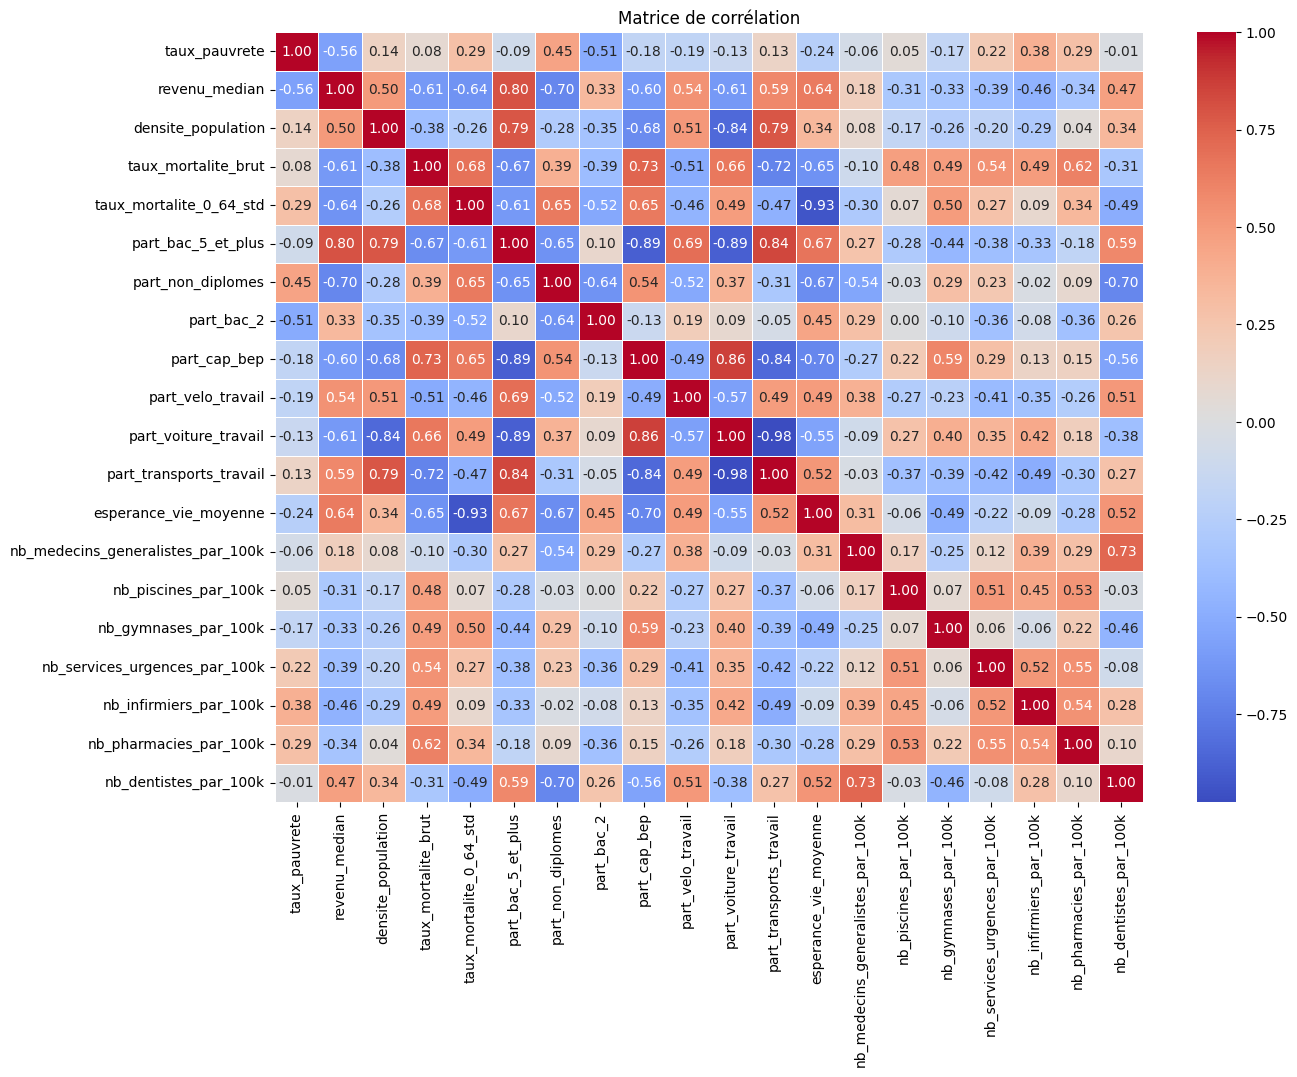

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

df_num = health_anova_regression.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_num.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


La matrice de corrélation est un outil essentiel pour sélectionner intelligemment les variables à inclure dans des analyses comme la régression linéaire. Elle permet notamment :

- d’identifier les variables les plus corrélées à la variable cible (ex. espérance de vie), qui seront donc les meilleures candidates comme prédicteurs 

- de repérer les variables fortement corrélées entre elles, ce qui peut indiquer qu’elles traduisent le même phénomène (ex. pauvreté et revenu médian). Dans ce cas, il est préférable de n’en garder qu’une pour éviter des problèmes de colinéarité

| Variable                  | Corrélation avec `esperance_vie_moyenne` | Commentaire                                                            |
| ------------------------- | ---------------------------------------- | ---------------------------------------------------------------------- |
| `part_non_diplomes`       | **-0.67**                                | Très pertinente                                                     |
| `part_bac_5_et_plus`      | **+0.67**                                |  Complémentaire                                                       |
| `revenu_median`           | **+0.64**                                |  Socio-éco                                                            |
| `part_bac_2`              | **+0.45**                                |  Corrélation modérée                                                  |
| `part_transports_travail` | **+0.52**                                | 🤔 À tester, intéressant                                               |
| `nb_medecin_generaliste_par_100k`   | **+0.31**                                | Correct, mais plus faible                                              |
| `nb_pharmacies_par_100k`  | **+0.29**                                | Idem                                                                   |


| Couple                                             | Corrélation | Choix recommandé                               |
| -------------------------------------------------- | ----------- | ---------------------------------------------- |
| `taux_pauvrete` & `revenu_median`                  | **-0.56**   | Garde **revenu_median**                        |
| `part_non_diplomes` & `part_bac_5_et_plus`         | **-0.65**   | Garde **un seul** (le plus pertinent pour toi) |
| `part_voiture_travail` & `part_transports_travail` | **-0.98**   | Garde **un seul**                              |


# ÉTAPE 3: RÉGRESSION LINÉAIRE SIMPLE

## 1) X = part des non diplômés

In [218]:
from sklearn.linear_model import LinearRegression

X = health_anova_regression[['part_non_diplomes']]
y = health_anova_regression['esperance_vie_moyenne']

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient (pente) : {model.coef_[0]:.3f}")
print(f"Intercept : {model.intercept_:.3f}")
print(f"R² : {model.score(X, y):.3f}")


Coefficient (pente) : -0.210
Intercept : 86.767
R² : 0.451


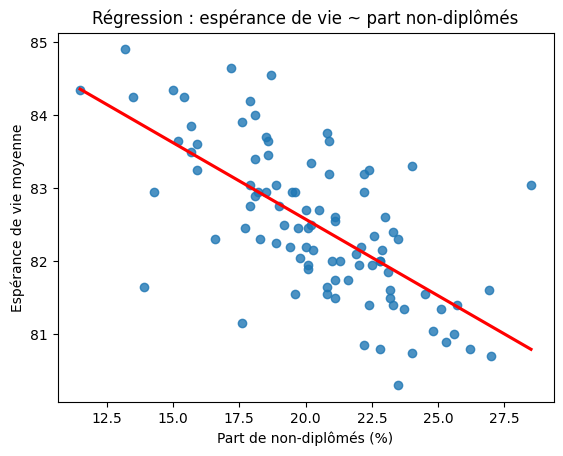

In [219]:
sns.regplot(
    x='part_non_diplomes',
    y='esperance_vie_moyenne',
    data=health_anova_regression,
    ci=None,
    line_kws={'color': 'red'}
)
plt.title("Régression : espérance de vie ~ part non-diplômés")
plt.xlabel("Part de non-diplômés (%)")
plt.ylabel("Espérance de vie moyenne")
plt.show()


Plus la part de non-diplômés dans un département est élevée, plus l’espérance de vie moyenne y est faible.
Ce lien est fort et linéaire : à lui seul, ce facteur explique environ 45 % des différences d’espérance de vie entre départements.

## 2) X = part des diplômés BAC+5 et plus

In [220]:
X = health_anova_regression[['part_bac_5_et_plus']]
y = health_anova_regression['esperance_vie_moyenne']

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient (pente) : {model.coef_[0]:.3f}")
print(f"Intercept : {model.intercept_:.3f}")
print(f"R² : {model.score(X, y):.3f}")


Coefficient (pente) : 0.123
Intercept : 81.334
R² : 0.447


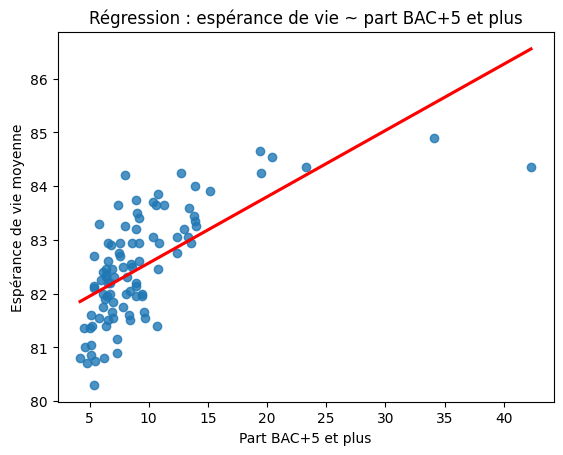

In [221]:
sns.regplot(
    x='part_bac_5_et_plus',
    y='esperance_vie_moyenne',
    data=health_anova_regression,
    ci=None,
    line_kws={'color': 'red'}
)
plt.title("Régression : espérance de vie ~ part BAC+5 et plus")
plt.xlabel("Part BAC+5 et plus")
plt.ylabel("Espérance de vie moyenne")
plt.show()


Les deux indicateurs d’éducation sont fortement liés à l’espérance de vie, dans des directions opposées :
 - Plus un département compte de non-diplômés, plus l’espérance de vie est faible
 - Plus il compte de Bac+5, plus elle est élevée

Dans les deux cas, le pouvoir explicatif est similaire (R² ≈ 0.45) :
l’éducation apparaît donc comme un déterminant clé de la santé territoriale. ✅

## Étape 4: Regression Linéaire multiple

In [222]:
from sklearn.metrics import mean_absolute_error

X = health_anova_regression[[
    'part_non_diplomes',
    'revenu_median',
    'part_transports_travail',
    'densite_population',
    'nb_medecins_generalistes_par_100k'
]]

y = health_anova_regression['esperance_vie_moyenne']

model = LinearRegression()
model.fit(X, y)

coeffs = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})

y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)

print(coeffs)
print(f"\nIntercept : {model.intercept_:.3f}")
print(f"R² (score global du modèle) : {model.score(X, y):.3f}")
print(f"Erreur moyenne absolue (MAE) : {mae:.2f} ans")


                            Variable  Coefficient
0                  part_non_diplomes    -0.137956
1                      revenu_median     0.000091
2            part_transports_travail     0.045055
3                 densite_population    -0.000108
4  nb_medecins_generalistes_par_100k     0.003914

Intercept : 82.584
R² (score global du modèle) : 0.586
Erreur moyenne absolue (MAE) : 0.53 ans


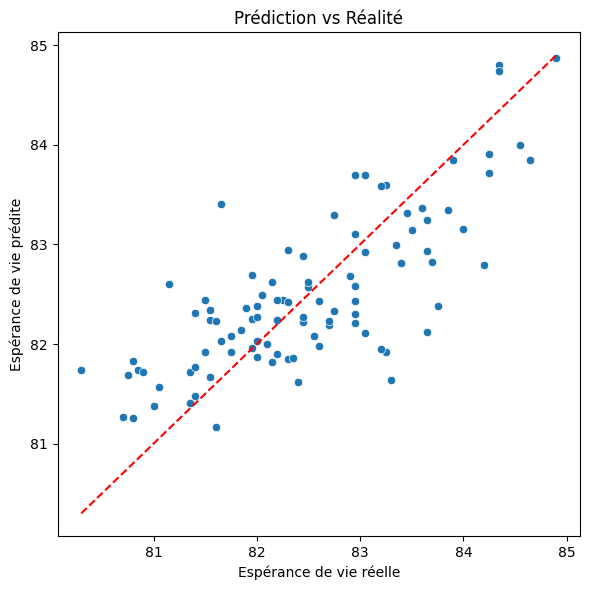

In [223]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Espérance de vie réelle")
plt.ylabel("Espérance de vie prédite")
plt.title("Prédiction vs Réalité")
plt.tight_layout()
plt.show()


## Étape 5: ANOVA

Est-ce que l’espérance de vie moyenne est significativement différente selon les catégories d’une variable qualitative (ex : précarité faible / moyenne / forte) ?

# 1) Précarité par le niveau d'études

In [224]:
health_anova_regression['groupe_precarite'] = pd.qcut(health_anova_regression['part_non_diplomes'], q=3, labels=['faible', 'moyenne', 'forte'])
health_anova_regression['groupe_precarite']

0      faible
1       forte
2       forte
3      faible
4      faible
       ...   
91     faible
92     faible
93      forte
94     faible
95    moyenne
Name: groupe_precarite, Length: 96, dtype: category
Categories (3, object): ['faible' < 'moyenne' < 'forte']

In [225]:
from scipy.stats import f_oneway

groupes = [health_anova_regression[health_anova_regression['groupe_precarite'] == g]['esperance_vie_moyenne'] for g in health_anova_regression['groupe_precarite'].unique()]

f_stat, p_value = f_oneway(*groupes)
print(f"Statistique F : {f_stat:.2f}")
print(f"p-value : {p_value:.13f}")


Statistique F : 35.98
p-value : 0.0000000000027


/tmp/ipykernel_573669/1433203913.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='groupe_precarite', y='esperance_vie_moyenne', data=health_anova_regression, palette='Set2')


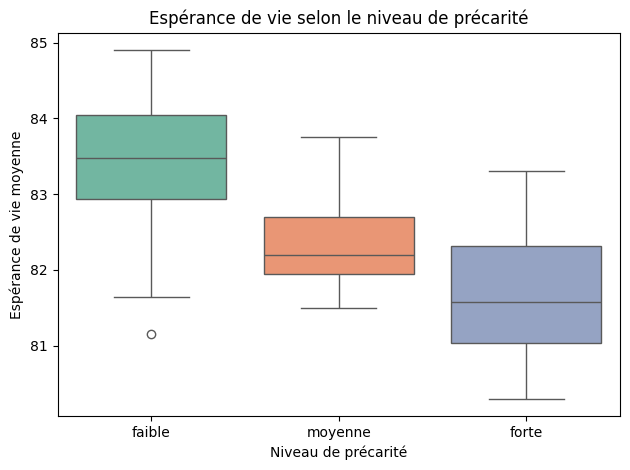

In [226]:
sns.boxplot(x='groupe_precarite', y='esperance_vie_moyenne', data=health_anova_regression, palette='Set2')
plt.title("Espérance de vie selon le niveau de précarité")
plt.xlabel("Niveau de précarité")
plt.ylabel("Espérance de vie moyenne")
plt.tight_layout()
plt.show()


Il existe une relation statistiquement significative entre le niveau de précarité d’un territoire (mesuré par la part de non-diplômés) et son espérance de vie moyenne.
Les territoires plus précaires ont une espérance de vie plus faible en moyenne.

# 2) Précarité par le revenu moyen

In [227]:
health_anova_regression['groupe_revenu'] = pd.qcut(health_anova_regression['revenu_median'], q=3, labels=['bas', 'moyen', 'élevé'])
health_anova_regression['groupe_revenu']

0     élevé
1       bas
2       bas
3       bas
4     moyen
      ...  
91    élevé
92    élevé
93      bas
94    élevé
95    élevé
Name: groupe_revenu, Length: 96, dtype: category
Categories (3, object): ['bas' < 'moyen' < 'élevé']

In [228]:
groupes = [health_anova_regression[health_anova_regression['groupe_revenu'] == g]['esperance_vie_moyenne'] for g in health_anova_regression['groupe_revenu'].unique()]
f_stat, p_value = f_oneway(*groupes)

print(f"Statistique F : {f_stat:.2f}")
print(f"p-value : {p_value:.4f}")


Statistique F : 25.79
p-value : 0.0000


/tmp/ipykernel_573669/1895885611.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='groupe_revenu', y='esperance_vie_moyenne', data=health_anova_regression, palette='Set3')


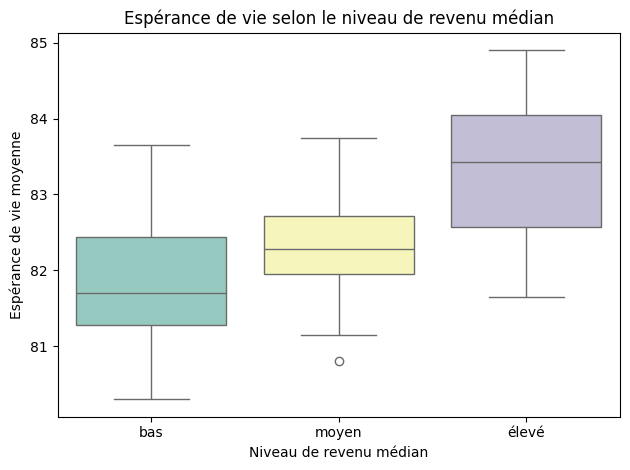

In [229]:
sns.boxplot(x='groupe_revenu', y='esperance_vie_moyenne', data=health_anova_regression, palette='Set3')
plt.title("Espérance de vie selon le niveau de revenu médian")
plt.xlabel("Niveau de revenu médian")
plt.ylabel("Espérance de vie moyenne")
plt.tight_layout()
plt.show()


L’analyse montre une différence significative d’espérance de vie entre les départements selon leur niveau de revenu médian.

En moyenne, plus le revenu est élevé, plus l’espérance de vie augmente.

Cette relation est confirmée statistiquement par une ANOVA très significative (p < 0.001).